<a href="https://colab.research.google.com/github/CristiSavca/DataScience-MicroCredential/blob/main/Stock_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform Stock market data analysis


# Task 1 - Environment Set Up

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# For division
from __future__ import division
!pip install yfinance
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
# from pandas_datareader import DataReader
import yfinance as yf
# For time stamps
from datetime import datetime



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Task 2 - Data Collection

Gather stock data for Apple, Google, Microsoft and Amazon

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['COST','SAM','BTI','PFE','NFLX','TGT']
df = tech_list

# Set up End and Start times for data grab
end = datetime(2022,7,31)
start = datetime(2020,3,1)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:
  # Set DataFrame as the Stock Ticker
  globals()[stock] = yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Summary Stats
COST.describe()

,Open,High,Low,Close,Adj Close,Volume
count,609.000000,609.000000,609.000000,609.000000,609.000000,6.090000e+02
mean,412.321478,416.704499,408.249820,412.704499,406.636818,2.571845e+06
std,85.424280,86.615293,84.257636,85.544021,89.265843,1.200928e+06
min,280.440002,288.799988,276.339996,279.850006,267.623260,9.725000e+05
25%,343.140015,345.839996,340.390015,343.910004,331.017242,1.778000e+06
50%,383.000000,385.500000,380.299988,382.760010,377.040253,2.251100e+06
75%,485.029999,493.559998,480.309998,488.260010,486.527405,2.938600e+06
max,607.280029,612.270020,597.729980,608.049988,606.016296,9.511600e+06


In [ ]:
# General Info
COST.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 609 entries, 2020-03-02 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       609 non-null    float64
 1   High       609 non-null    float64
 2   Low        609 non-null    float64
 3   Close      609 non-null    float64
 4   Adj Close  609 non-null    float64
 5   Volume     609 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.3 KB


# Task 3 - Exploratory Data Analysis (EDA)

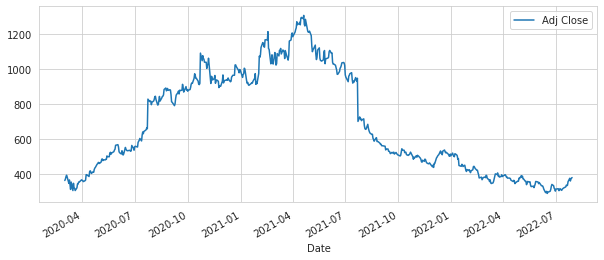

In [ ]:
# Let's see a historical view of the closing price
SAM['Adj Close'].plot(legend=True,figsize=(10,4))

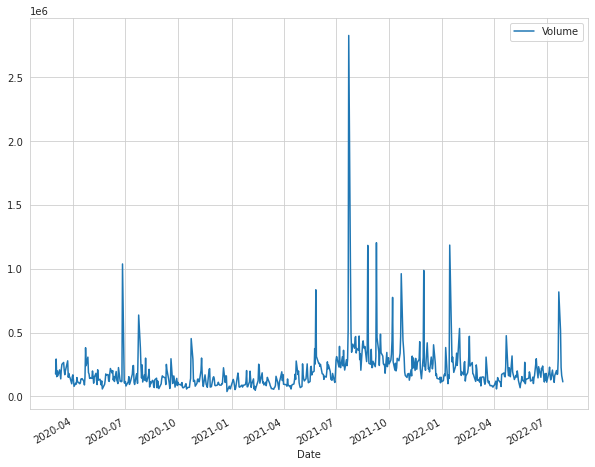

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
SAM['Volume'].plot(legend=True,figsize=(10,8))

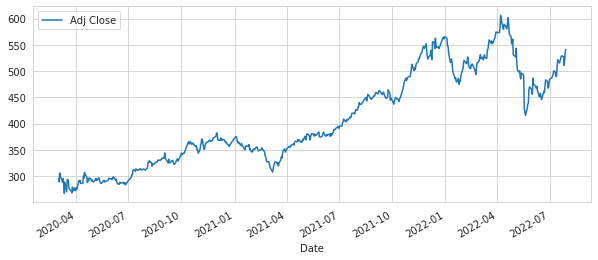

In [ ]:
# Let's see a historical view of the closing price
COST['Adj Close'].plot(legend=True,figsize=(10,4))

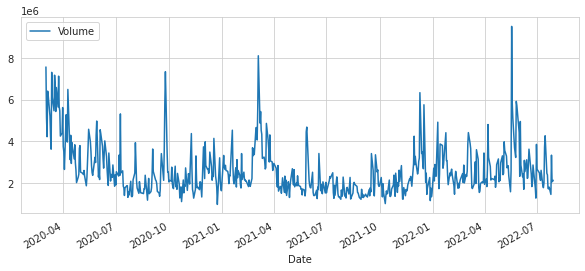

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
COST['Volume'].plot(legend=True,figsize=(10,4))

In [ ]:
COST.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,294.440002,309.510010,291.380005,309.140015,295.633575,7563800
2020-03-03,309.140015,314.170013,301.029999,302.730011,289.503632,5131400
2020-03-04,308.290009,320.970001,305.019989,320.739990,306.726746,4219300
2020-03-05,315.769989,324.510010,313.200012,315.760010,301.964386,6407700
2020-03-06,312.140015,317.489990,302.750000,311.339996,297.737488,6185500


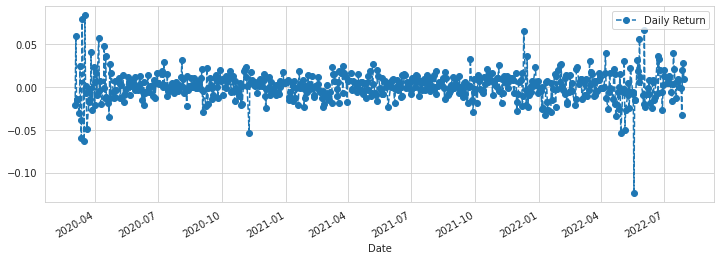

In [ ]:
# We'll use pct_change to find the percent change for each day
COST['Daily Return'] = COST['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
COST['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

## Write your observations 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


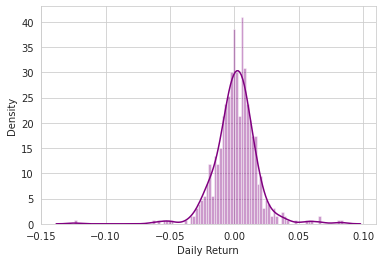

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(COST['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#COST['Daily Return'].hist()

## Write your observations 

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(['COST','SAM','BTI','PFE','NFLX','TGT'],start,end)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
# Let's take a quick look
closing_df.head()

,BTI,COST,NFLX,PFE,SAM,TGT
Date,,,,,,
2020-03-02,32.743126,295.633667,381.049988,30.193899,363.799988,104.504707
2020-03-03,32.867115,289.503632,368.769989,29.691820,371.589996,101.419212
2020-03-04,34.809715,306.726776,383.790009,31.509684,385.010010,103.316505
2020-03-05,34.751846,301.964355,372.779999,30.695978,393.910004,101.543777
2020-03-06,33.817753,297.737488,368.970001,30.315086,384.929993,101.524620


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

## Write your observations 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


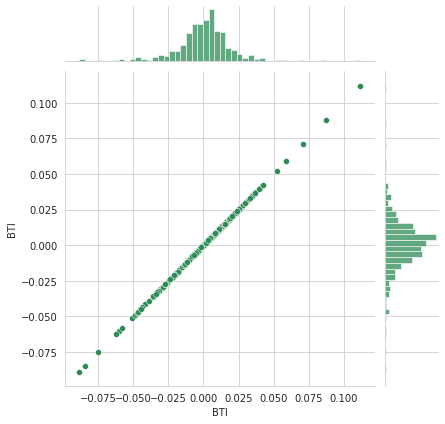

In [ ]:
# Comparing British American Tobacco to itself should show a perfectly linear relationship
sns.jointplot('BTI','BTI',tech_rets,kind='scatter',color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


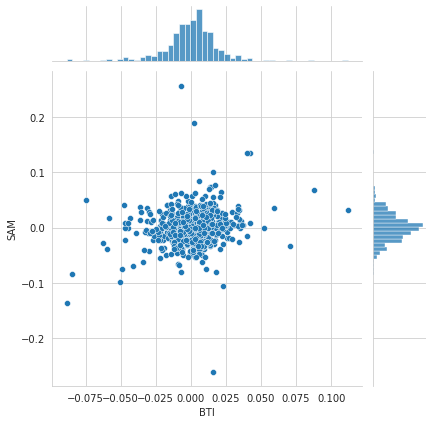

In [ ]:
# We'll use joinplot to compare the daily returns of drug stocks
sns.jointplot('BTI','SAM',tech_rets,kind='scatter')

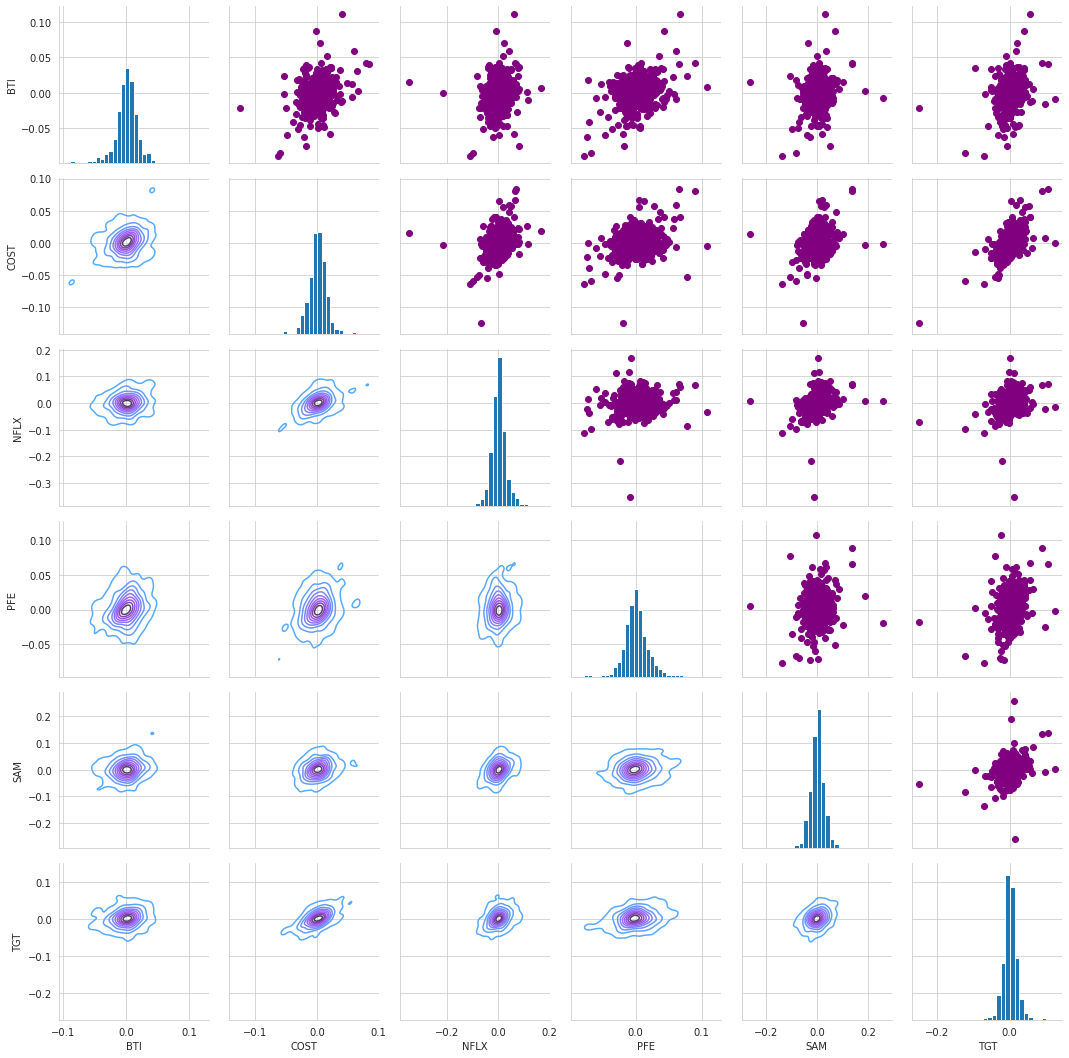

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

## Write your observations 

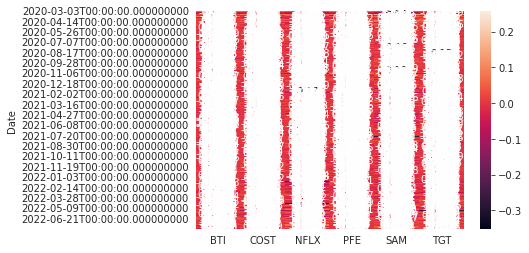

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna(),annot=True)

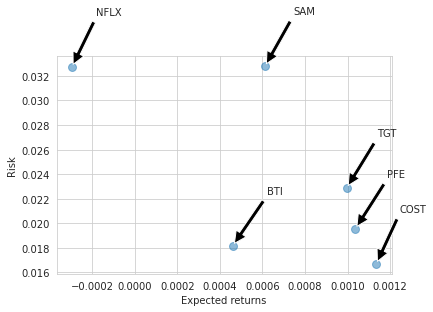

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.025])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black', shrink=0.05)
        # arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
        )

## Write your observations 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


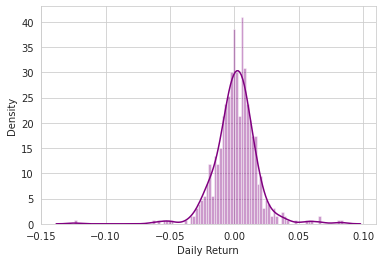

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(COST['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
# The 0.05 empirical quantile of daily returns
rets['COST'].quantile(0.05)

-0.023452137759548807

In [ ]:
COST.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return'], dtype='object')

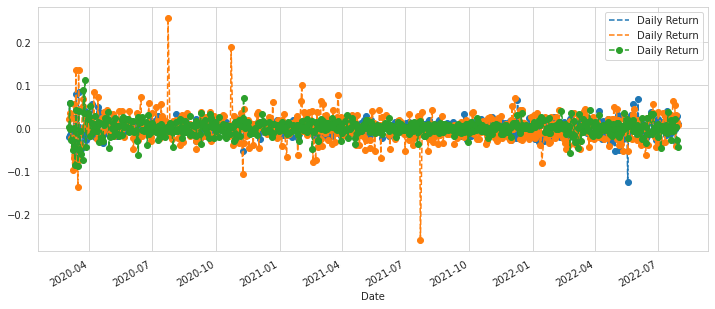

In [ ]:
# We'll use pct_change to find the percent change for each day
COST['Daily Return'] = COST['Adj Close'].pct_change()
SAM['Daily Return'] = SAM['Adj Close'].pct_change()
BTI['Daily Return'] = BTI['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
COST['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
SAM['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
BTI['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')

# Prepare data "Date" columns for merging

In [ ]:
COST.reset_index(inplace=True)

In [ ]:
SAM.reset_index(inplace=True)

In [ ]:
BTI.reset_index(inplace=True)

In [ ]:
PFE.reset_index(inplace=True)

In [ ]:
NFLX.reset_index(inplace=True)

In [ ]:
TGT.reset_index(inplace=True)

In [ ]:
dfs = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/tests.csv')

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')


In [ ]:
ny_df = df3[df3['state']=='New York']
nyc = ny_df[df3['date'] < '2022-08-01']

In [ ]:
dates = dfs['DATE']
new_dates = []
for date in dates:
    new = ''
    for char in date:
        if char == '/':
            new = new + '-'
        else:
            new = new + char
    new_dates.append(new)

In [ ]:
dfs['DATE'] = new_dates

In [ ]:
new_dates2 = []
for date in new_dates:
    new = ''
    if '2020' in date:
        new = '2020-' + date[0:5]
    if '2021' in date:
        new = '2021-' + date[0:5]
    if '2022' in date:
        new = '2022-' + date[0:5]
    new_dates2.append(new)

In [ ]:
dfs['DATE'] = new_dates2

In [ ]:
dfs.rename(columns = {'DATE':'Date'}, inplace = True)

In [ ]:
nyc.rename(columns = {'date':'Date'}, inplace = True)

# Change data type to string for merging

In [ ]:
nyc['Date'] = nyc['Date'].astype(str)

In [ ]:
dfs['Date'] = dfs['Date'].astype(str)

In [ ]:
COST['Date'] = COST['Date'].astype(str)

In [ ]:
SAM['Date'] = SAM['Date'].astype(str)

In [ ]:
BTI['Date'] = BTI['Date'].astype(str)

In [ ]:
PFE['Date'] = SAM['Date'].astype(str)

In [ ]:
NFLX['Date'] = SAM['Date'].astype(str)

In [ ]:
TGT['Date'] = SAM['Date'].astype(str)

# Drop columns we won't use

In [ ]:
dfs = dfs[['Date','TOTAL_TESTS','POSITIVE_TESTS', 'TOTAL_ANTIGEN_TESTS']]

In [ ]:
nyc = nyc[['Date', 'cases', 'deaths']]

In [ ]:
COST.drop(columns=['Open','High','Low','Adj Close', 'Volume', 'Daily Return'], inplace=True)

In [ ]:
SAM.drop(columns=['Open','High','Low','Adj Close', 'Volume', 'Daily Return'], inplace=True)

In [ ]:
BTI.drop(columns=['Open','High','Low','Adj Close', 'Volume', 'Daily Return'], inplace=True)

In [ ]:
PFE.drop(columns=['Open','High','Low','Adj Close', 'Volume'], inplace=True)

In [ ]:
NFLX.drop(columns=['Open','High','Low','Adj Close', 'Volume'], inplace=True)

In [ ]:
TGT.drop(columns=['Open','High','Low','Adj Close', 'Volume'], inplace=True)

# Rename "Close price" columns to respective stock

In [ ]:
COST.rename(columns = {'Close':'COST Close'}, inplace = True)

In [ ]:
SAM.rename(columns = {'Close':'SAM Close'}, inplace = True)

In [ ]:
BTI.rename(columns = {'Close':'BTI Close'}, inplace = True)

In [ ]:
PFE.rename(columns = {'Close':'PFE Close'}, inplace = True)

In [ ]:
NFLX.rename(columns = {'Close':'NFLX Close'}, inplace = True)

In [ ]:
TGT.rename(columns = {'Close':'TGT Close'}, inplace = True)

# Merge all 6 stocks datasets with the 2 covid datasets

In [ ]:
CC = pd.merge(nyc,dfs)

In [ ]:
COST_SAM = pd.merge(COST, SAM)

In [ ]:
COST_SAM_BTI = pd.merge(COST_SAM, BTI)

In [ ]:
COST_SAM_BTI_PFE = pd.merge(COST_SAM_BTI, PFE)

In [ ]:
CSBPN = pd.merge(COST_SAM_BTI_PFE, NFLX)

In [ ]:
CSBPNT = pd.merge(CSBPN,TGT)

In [ ]:
DF = pd.merge(CSBPNT, CC)

# Final Merged Dataset

In [ ]:
DF.head()

,Date,COST Close,SAM Close,BTI Close,PFE Close,NFLX Close,TGT Close,cases,deaths,TOTAL_TESTS,POSITIVE_TESTS,TOTAL_ANTIGEN_TESTS
0,2020-03-03,302.730011,371.589996,39.759998,32.542694,368.769989,105.839996,2,0,15,1,0
1,2020-03-04,320.739990,385.010010,42.110001,34.535103,383.790009,107.820000,11,0,40,5,0
2,2020-03-05,315.760010,393.910004,42.040001,33.643265,372.779999,105.970001,22,0,66,4,0
3,2020-03-06,311.339996,384.929993,40.910000,33.225807,368.970001,105.949997,44,0,89,8,0
4,2020-03-09,301.980011,347.209991,38.830002,32.030361,346.489990,104.029999,142,0,409,60,44


# Visualize Merged Dataset

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=COST['Date'],y=COST['COST Close'],name='COST Close'),secondary_y=False)
fig2.add_trace(go.Scatter(x=SAM['Date'],y=SAM['SAM Close'],name='SAM Close'),secondary_y=False)
fig2.add_trace(go.Scatter(x=BTI['Date'],y=BTI['BTI Close'],name='BTI Close'),secondary_y=False)
fig2.add_trace(go.Scatter(x=PFE['Date'],y=PFE['PFE Close'],name='PFE Close'),secondary_y=False)
fig2.add_trace(go.Scatter(x=NFLX['Date'],y=NFLX['NFLX Close'],name='NFLX Close'),secondary_y=False)
fig2.add_trace(go.Scatter(x=TGT['Date'],y=TGT['TGT Close'],name='TGT Close'),secondary_y=False)
fig2.add_trace(go.Bar(x=NFLX['Date'],y=DF['cases'],name='cases'),secondary_y=True)
fig2.update_layout(title_text='Closing Price and corresponding # of Cases for our 6 STONKS (3/3/20 - 7/31/22)')
fig2.show()

## Write your observations 

At first, as the covid cases rose, people turned to alcohol and tobacco and entertainment services. But as covid got worse and cases increased exponentially, even the drugs and entertainment couldn't help them, so the bulk shopping places such as costco and stuff increased as people focused on surviving, causing them to go to cheaper bulk retailers such as costco and target

# Your final thoughts...

Covid is very bad and the way stocks were affected was very interesting and never seen before